### Regression code

In [11]:
import scipy.misc
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot, transforms
import math

In [12]:
def linreg(x1,y1):
    model = LinearRegression()
    x1 = x1.reshape(-1, 1)
    y1 = y1.reshape(-1, 1)
    model.fit(x1, y1)
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    plt.scatter(x1, y1,color='g')
    plt.plot(x1, model.predict(x1),color='k')

In [13]:

def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    #print((Z.shape))
    assert(len(Z.shape) == 2)

    
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z <= threshold)

    # Minimal dimension of image
    p = min(Z.shape)
    #print(Z.shape)
    
    #print(Z.shape)
    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))
    #print(n)
    
    # Extract the exponent
    n = int(np.log(n)/np.log(2))
    #print(n)
    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)
    sizes = list(sizes)
    
    
    #print(sizes)
    # Actual box counting with decreasing size
    counts = []
    
    ### remove 
    #sizes.append(1)
    #sizes.append(2)
    #sizes.append(3)
    #sizes.append(5)
    
    ### remove 
    sizes = np.array(sizes)
    
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)

    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)
    
    #print(x)
    #print(y)
    
    
    
    return -coeffs[0], x, y


#coeff, x, y  = fractal_dimension(I)
#print("Minkowski–Bouligand dimension (computed): ", coeff)
#print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))

In [18]:
def start(filename, pixel_threshold = 0.9):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    
    # testing inverse of inages
    #I = cv2.bitwise_not(I)
    #
    I = I/256
    
    
    coeff, x, y  = fractal_dimension(I, pixel_threshold)
    #print("Minkowski–Bouligand dimension (computed): ", coeff)
    return coeff, x, y

In [15]:
def save_csv(xs, ys, filename):
    data_dict = []
    for i in  range(len(xs)):
        xval = str(xs[i])
        yval = str(ys[i])
        temp = dict(xs = xval, ys = yval)
        data_dict.append(temp)

    field_names = ['xs', 'ys']
    with open(filename, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = field_names)
        writer.writeheader()
        writer.writerows(data_dict)

Minkowski–Bouligand dimension (computed):  1.5338194415290292
intercept: [11.1795691]
slope: [[-1.53381944]]


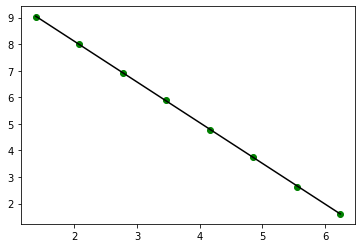

In [16]:
coeff, x, y = start("./SelfSimilarFractals/SierpinskiTriangleHD.png")
save_csv(x, y, "./csvs/SierpinskiTriangleHD.csv")
linreg(x,y)

Minkowski–Bouligand dimension (computed):  1.238430012010909
intercept: [10.56852261]
slope: [[-1.23843001]]


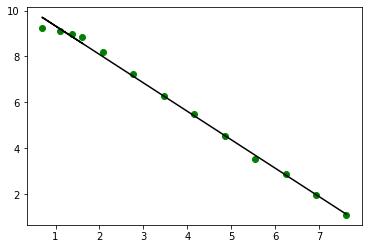

In [175]:
coeff, x, y = start("./SelfSimilarFractals/kochCurve.png")
save_csv(x, y, "./csvs/kochCurve.csv")
linreg(x,y)

Minkowski–Bouligand dimension (computed):  1.400106246748497
intercept: [10.47987616]
slope: [[-1.40010625]]


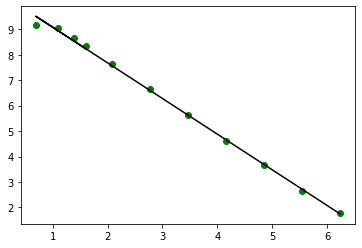

In [176]:
coeff, x, y = start("./SelfSimilarFractals/minkSausage.png")
save_csv(x, y, "./csvs/minkSausage.csv")
linreg(x,y)

Minkowski–Bouligand dimension (computed):  1.4271949258759296
intercept: [10.59965301]
slope: [[-1.42719493]]


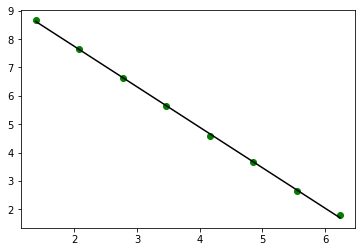

In [180]:
coeff, x, y = start("./SelfSimilarFractals/minkSausage.png")
save_csv(x, y, "./csvs/minkSausage.csv")
linreg(x,y)

Minkowski–Bouligand dimension (computed):  1.2718849457162957
intercept: [10.74881599]
slope: [[-1.27188495]]


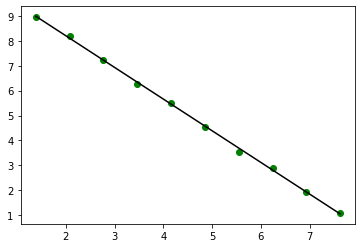

In [181]:
coeff, x, y = start("./SelfSimilarFractals/kochCurve.png")
save_csv(x, y, "./csvs/minkSausage.csv")
linreg(x,y)

Minkowski–Bouligand dimension (computed):  1.5338194415290292
intercept: [11.1795691]
slope: [[-1.53381944]]


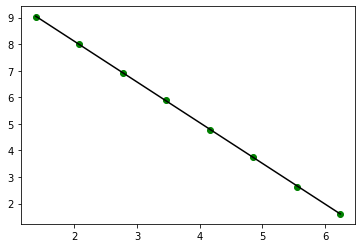

In [182]:
coeff, x, y = start("./SelfSimilarFractals/SierpinskiTriangleHD.png")
save_csv(x, y, "./csvs/minkSausage.csv")
linreg(x,y)

In [23]:
coeff

1.5414985591375965

- boundary pixels, (issues with 1 pixel size boxes)
- removal of useless box sizes, too small just checking pixels, too big...

In [167]:
coeff, x, y = start("./SelfSimilarFractals/translated/minkSausage10+10.png")

(900, 1200)
[512 256 128  64  32  16   8   4   2   3   5]
[6, 14, 36, 102, 276, 777, 2080, 5761, 9562, 8247, 4109]
[6.23832463 5.54517744 4.85203026 4.15888308 3.4657359  2.77258872
 2.07944154 1.38629436 0.69314718 1.09861229 1.60943791]
[1.79175947 2.63905733 3.58351894 4.62497281 5.62040087 6.65544035
 7.64012317 8.65886635 9.16555219 9.01760478 8.32093497]
Minkowski–Bouligand dimension (computed):  1.4007850089810898


In [21]:
coeff, x, y = start("./SelfSimilarFractals/translated/kochCurve10+10.png")

Minkowski–Bouligand dimension (computed):  1.2677017441507263


In [22]:
coeff, x, y = start("./SelfSimilarFractals/translated/SierpinskiTriangleHD10+10.png")

Minkowski–Bouligand dimension (computed):  1.5414985591375965


### Showing Regression Plots of fractals

intercept: [11.20459123]
slope: [[-1.50851977]]


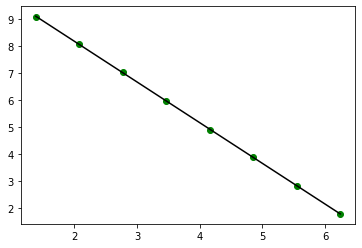

In [30]:
linreg(x, y)

In [166]:
coeff, x, y = start("./SelfSimilarFractals/greatbritain.png")
save_csv(x, y, "./csvs/greatbritain.csv")

(432, 432)
[256 128  64  32  16   8   4   2   3   5]
[4, 10, 23, 59, 135, 308, 734, 1508, 1048, 562]
[5.54517744 4.85203026 4.15888308 3.4657359  2.77258872 2.07944154
 1.38629436 0.69314718 1.09861229 1.60943791]
[1.38629436 2.30258509 3.13549422 4.07753744 4.90527478 5.73009978
 6.59850903 7.31853955 6.95463886 6.33150185]
Minkowski–Bouligand dimension (computed):  1.2344443203579971


intercept: [8.28868698]
slope: [[-1.23444432]]


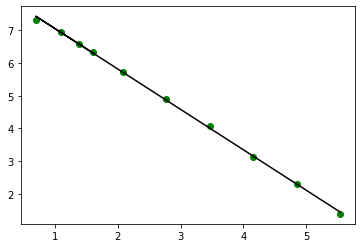

In [163]:
linreg(x,y)

### Transalting image and saving it to the directory.

In [2]:
def translate(file_name, lr, ud):
    ROOT = "./SelfSimilarFractals/"
    
    file_dir = ROOT + file_name
    
    img = cv2.imread(file_dir)
    num_rows, num_cols = img.shape[:2]
    
    translation_matrix = np.float32([ [1,0,lr], [0,1,ud] ])
    img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), borderValue=(255,255,255))
    
    new_path = ROOT + "translated/"+file_name[:-4]+ str(int(lr)) + "+" + str(int(ud)) + file_name[-4:]
    
    #plt.imshow(img_translation)
    cv2.imwrite(new_path, img_translation)
    return new_path
    
    

In [10]:
translate("GreatBritain.png", 10 , 10)

'./SelfSimilarFractals/translated/GreatBritain10+10.png'

In [3]:
translate("GreatBritain.png", 10 , 10)
translate("minkSausage.png", 10 ,10)
translate("kochCurve.png", 10 ,10 )
translate("SierpinskiTriangleHD.png", 10 ,10)

'./SelfSimilarFractals/translated/SierpinskiTriangleHD10+10.png'

In [56]:
def multi_translations(image, x, y):
    new_path = translate(image, x, y)
    coeff, x, y = start(new_path)
    return coeff

In [80]:
files = ["GreatBritain.png", "minkSausage.png", "kochCurve.png", "SierpinskiTriangleHD.png", "JuliaSet.png"]
x= [0,1, -1 ,1 , -1, 1, 0,-1,0]
y = [0,1 ,-1 ,-1, 1, 0, 1, 0,-1]

x = list(np.array(x)*10)
x = x +list(np.array(x)*2)  + list(np.array(x)*3) 
y = list(np.array(y)*10)
y = y +list(np.array(y)*2) + list(np.array(y)*3) 

In [81]:
x

[0,
 10,
 -10,
 10,
 -10,
 10,
 0,
 -10,
 0,
 0,
 20,
 -20,
 20,
 -20,
 20,
 0,
 -20,
 0,
 0,
 30,
 -30,
 30,
 -30,
 30,
 0,
 -30,
 0]

In [82]:
y

[0,
 10,
 -10,
 -10,
 10,
 0,
 10,
 0,
 -10,
 0,
 20,
 -20,
 -20,
 20,
 0,
 20,
 0,
 -20,
 0,
 30,
 -30,
 -30,
 30,
 0,
 30,
 0,
 -30]

In [83]:
def normalize(x, newRange=(0, 1)): #x is an array. Default range is between zero and one
    xmin, xmax = np.min(x), np.max(x) #get max and min from input array
    norm = (x - xmin)/(xmax - xmin) # scale between zero and one
    
    if newRange == (0, 1):
        return(norm) # wanted range is the same as norm
    elif newRange != (0, 1):
        return norm * (newRange[1] - newRange[0]) + newRange[0] #scale to a different range.    
    #add other conditions here. For example, an error message

In [84]:
s = {}
for file in files:
    s[file] = []
for file in files:
    for idx in range(len(x)):
        s[file].append(multi_translations(file, x[idx], y[idx]))

for fractal in s.keys():
    init = s[fractal][0]
    for idx in range(len(s[fractal])):
        s[fractal][idx] = abs(s[fractal][idx]-init)

for fractal in s.keys():
    s[fractal] = list(normalize(s[fractal], (0,200)))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [85]:
s

{'GreatBritain.png': [0.0,
  59.557074684868304,
  29.50043385600223,
  106.62405480211758,
  5.428912931241758,
  75.87606827368072,
  3.5580290257467126,
  0.360255863067484,
  38.177483461497644,
  0.0,
  90.11858070104746,
  1.8744308476697575,
  147.04534406475295,
  157.95310938265575,
  169.33158525485922,
  27.47528298119528,
  6.914245564250865,
  0.9643411301049004,
  0.0,
  114.30173005149871,
  42.687442590338556,
  121.62472688112315,
  134.70847797664405,
  191.8785231982964,
  55.262218650534265,
  200.0,
  25.530542777830494],
 'minkSausage.png': [0.0,
  57.355940710440045,
  14.05342108693757,
  10.465005368830258,
  1.4533558040739687,
  80.0758566640909,
  13.473045994808434,
  47.281816496620735,
  17.48665937442301,
  0.0,
  24.511654343850026,
  4.50720236061098,
  200.0,
  19.052489121150153,
  183.73253616903378,
  57.248781424684815,
  31.989907236709048,
  34.19126284325753,
  0.0,
  21.831364334826883,
  118.05173893401559,
  186.46085995693284,
  164.0447326

IndexError: list index out of range

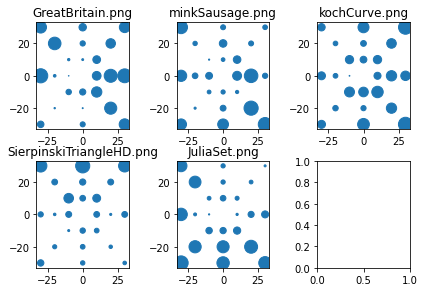

In [88]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()
count = 0
for i in range(2):
    for j in range(3):
        axs[i,j].scatter(x, y, s[list(s.keys())[count]])
        axs[i,j].title.set_text(list(s.keys())[count])
        #fig.set_title(list(s.keys())[count])
        count +=1 
        #print(i)
        #print(j)

IndexError: list index out of range

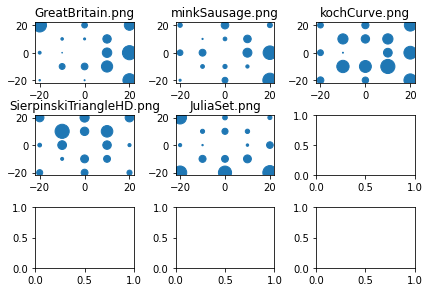

In [55]:
fig, axs = plt.subplots(3, 3)
fig.tight_layout()
count = 0
for i in range(2):
    for j in range(3):
        axs[i,j].scatter(x, y, s[list(s.keys())[count]])
        axs[i,j].title.set_text(list(s.keys())[count])
        #fig.set_title(list(s.keys())[count])
        count +=1 
        #print(i)
        #print(j)


In [ ]:
range(1)

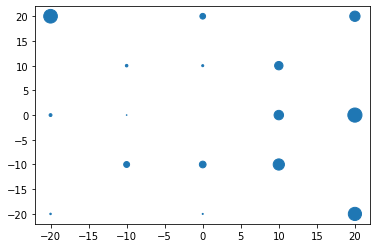

In [29]:
plt.scatter(x, y, s =s["GreatBritain.png"])

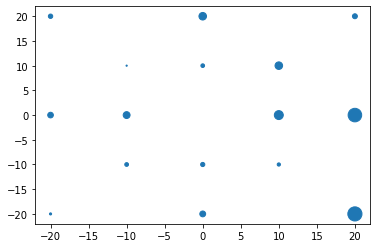

In [30]:
plt.scatter(x, y, s =s["minkSausage.png"])

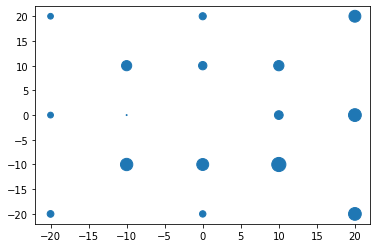

In [31]:
plt.scatter(x, y, s =s["kochCurve.png"])

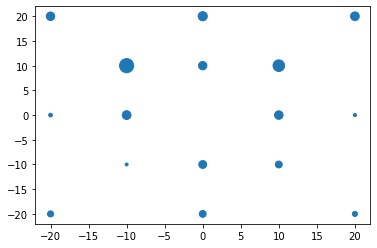

In [32]:
plt.scatter(x, y, s =s["SierpinskiTriangleHD.png"])